In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import missingno as msno
from tqdm.notebook import tqdm 

import matplotlib
from matplotlib import rc

rc("font", **{"family": "sans-serif", "sans-serif": "DejaVu Sans"})
rc("figure", **{"dpi": 100})
rc(
    "axes",
    **{"spines.right": False, "spines.top": False, "xmargin": 0.0, "ymargin": 0.05}
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data loading

In [2]:
df = pd.read_csv('../input/eurecom-aml-2023-challenge-1/public/train.csv', low_memory=True)
df_test = pd.read_csv('../input/eurecom-aml-2023-challenge-1/public/test_feat.csv', low_memory=True)

# Summarize data
## General information
* number of attributes
* number of instances 
* feature types

In [3]:
df.head()

,index,fact_time,fact_latitude,fact_longitude,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_6_2,cmc_0_0_7_1000,...,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,fact_temperature
0,0,1.538665e+09,42.696693,23.411436,532.0,11.436109,15.718571,694.970318,279.984589,10.375,...,0.0,0.0,0.0,0.0,0.0,0.058990,0.808984,0.0,0.0,19.0
1,1,1.539436e+09,51.447778,4.341944,20.0,26.956421,12.511429,759.973131,288.606445,8.375,...,0.0,0.0,0.0,0.0,0.0,0.348022,16.150018,0.0,0.0,25.0
2,2,1.541235e+09,39.175400,-76.668297,42.0,-45.928553,10.842857,759.321626,284.499634,1.125,...,0.0,0.0,0.0,0.0,0.0,-1.500000,5.950006,0.0,100.0,11.0
3,3,1.544501e+09,36.029598,-119.063004,132.0,-25.871600,15.259286,754.582732,278.388733,2.500,...,0.0,0.0,0.0,0.0,0.0,0.299988,6.450006,0.0,0.0,9.0
4,4,1.538634e+09,34.398300,-96.148102,179.0,-61.020501,20.564286,744.448625,294.560196,3.250,...,0.0,0.0,0.0,0.0,0.0,-0.500000,20.749994,0.0,0.0,23.0


In [4]:
print(f'Number of features: {df.shape[1]}')
print(f'Number of instances: {df.shape[0]}')

Number of features: 113

Number of instances: 1993574


# Data analysis

In [5]:
df.describe(include="all")

,index,fact_time,fact_latitude,fact_longitude,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_6_2,cmc_0_0_7_1000,...,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,fact_temperature
count,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.991773e+06,1.991773e+06,...,1.991773e+06,1.991773e+06,1.991773e+06,1.991773e+06,1.991773e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06,1.993574e+06
mean,9.967865e+05,1.543582e+09,3.115462e+01,-2.703852e+01,3.285789e+02,-5.860210e+00,1.351736e+01,7.302612e+02,2.797381e+02,7.695832e+00,...,3.325517e-01,2.381313e-03,3.807693e-02,7.312622e-04,1.097395e-02,6.764290e-03,6.311309e+00,1.549980e-03,1.965856e+01,1.331723e+01
std,5.754954e+05,4.515794e+06,2.088655e+01,7.436018e+01,5.194110e+02,3.672498e+01,8.723483e+00,4.484426e+01,9.535258e+00,5.933824e+00,...,1.995224e+00,7.590582e-02,4.962380e-01,4.491461e-02,2.661001e-01,1.509631e+00,9.470227e+00,1.797734e+01,3.335334e+01,1.000971e+01
min,0.000000e+00,1.535760e+09,-6.760167e+01,-1.663390e+02,-2.126000e+03,-8.989978e+01,-2.721357e+01,4.072077e+02,2.249846e+02,0.000000e+00,...,0.000000e+00,-5.000000e-06,0.000000e+00,-5.000000e-06,0.000000e+00,-3.999998e+01,-6.865307e+01,-1.000000e+02,0.000000e+00,-4.500000e+01
25%,4.983932e+05,1.539669e+09,3.006920e+01,-9.114960e+01,2.300000e+01,-3.667559e+01,7.025714e+00,7.225525e+02,2.735037e+02,3.250000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.218262e-01,-4.999390e-02,0.000000e+00,0.000000e+00,6.000000e+00
50%,9.967865e+05,1.543582e+09,3.566000e+01,-1.721460e+01,1.160000e+02,-2.911450e+00,1.320000e+01,7.482880e+02,2.798528e+02,6.375000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.150018e+00,0.000000e+00,0.000000e+00,1.300000e+01
75%,1.495180e+06,1.547491e+09,4.153240e+01,2.461920e+01,3.910000e+02,2.422460e+01,2.000857e+01,7.584323e+02,2.866298e+02,1.050000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.787109e-01,1.315002e+01,0.000000e+00,2.700000e+01,2.100000e+01
max,1.993573e+06,1.551395e+09,7.093306e+01,1.753880e+02,4.659000e+03,8.986517e+01,4.599286e+01,8.051014e+02,3.028238e+02,3.062500e+01,...,1.151527e+02,1.585967e+01,3.725895e+01,1.298353e+01,3.961083e+01,5.190001e+01,2.924999e+01,1.000000e+02,1.000000e+02,6.000000e+01


Checking the different types of variables.

In [6]:
print(f'Type of features: {df.dtypes}') 
print(f'Type of features: {df.dtypes.nunique()}')

# Data types are either int64 or float64

Type of features: index                                int64

fact_time                          float64

fact_latitude                      float64

fact_longitude                     float64

topography_bathymetry              float64

                                    ...   

gfs_2m_dewpoint_grad               float64

gfs_2m_dewpoint_next               float64

gfs_total_clouds_cover_low_grad    float64

gfs_total_clouds_cover_low_next    float64

fact_temperature                   float64

Length: 113, dtype: object

Type of features: 2


## Histogram of the target temperature

<AxesSubplot: >

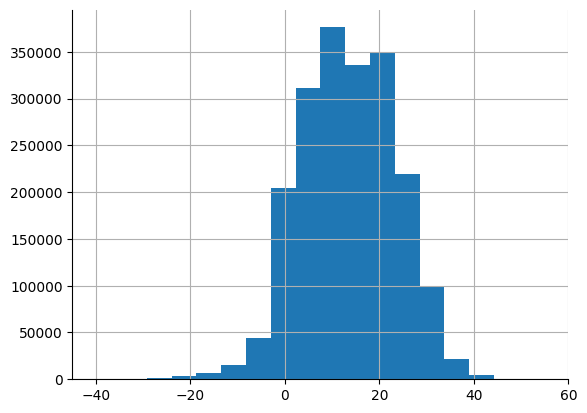

In [7]:
df["fact_temperature"].hist(bins=20)

## Look for missing data

In [9]:
# Percentage of missing data per each feature
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print("Percentage of missing data per each column:")
missing_value_df

Percentage of missing data per each column:


,column_name,percent_missing
index,index,0.000000
gfs_temperature_40000,gfs_temperature_40000,0.000000
gfs_temperature_35000,gfs_temperature_35000,0.000000
gfs_temperature_30000,gfs_temperature_30000,0.000000
gfs_temperature_25000,gfs_temperature_25000,0.000000
...,...,...
wrf_wind_u,wrf_wind_u,5.373916
wrf_rh2,wrf_rh2,5.373916
wrf_psfc,wrf_psfc,5.373916
wrf_t2_grad,wrf_t2_grad,5.373916


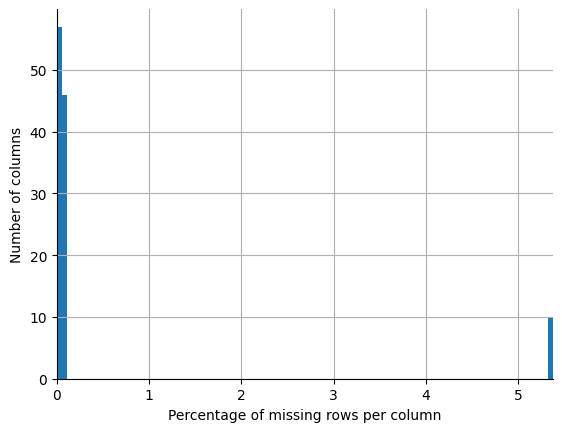

In [10]:
missing_value_df["percent_missing"].hist(bins=100)
plt.xlabel('Percentage of missing rows per column')
plt.ylabel('Number of columns')
plt.savefig('missing_rows_perc.png')

**Note**: No column with relevant percentage of missing data, hence no column is worth being deleted due to missing values!

### Visualizing the distribution of missing data
The missingno library allows to visualize missing data in many different ways. Here, matrix visualization is used: when data is present, the plot is shaded in grey and when it is absent the plot is displayed in white.

<AxesSubplot: >

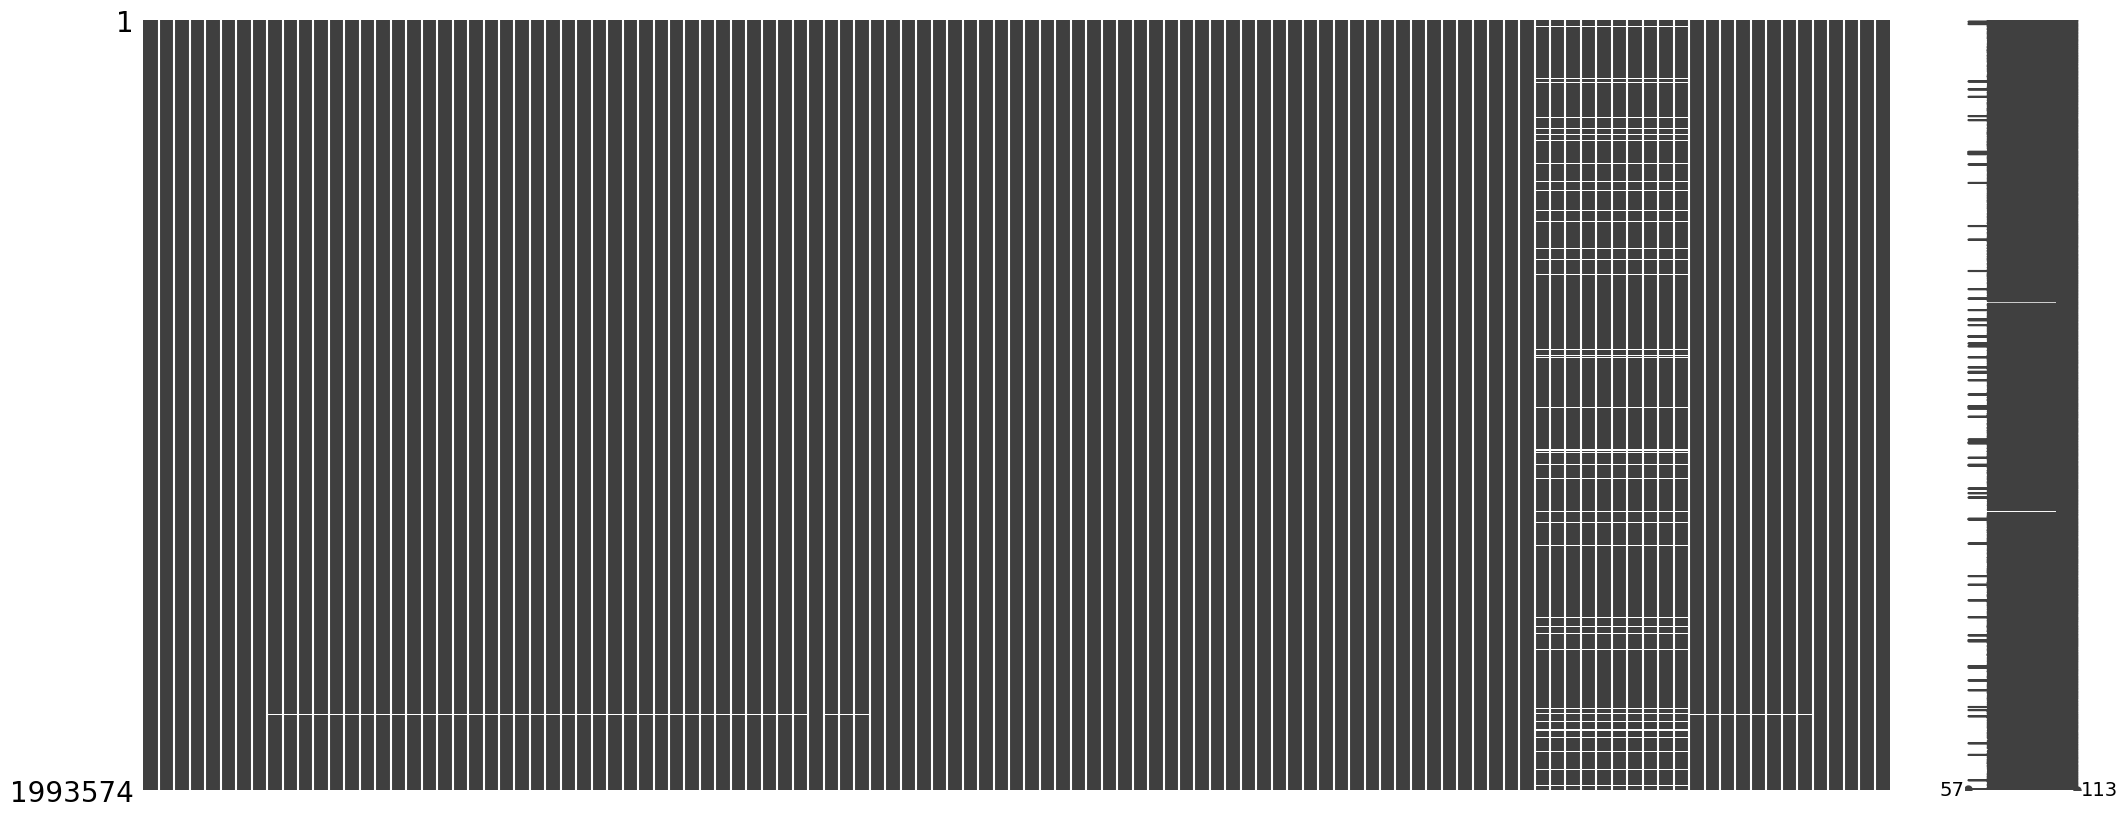

In [11]:
msno.matrix(df)

**Note**: as can be seen in the matrix plot, there is a group of adjacent columns with missing data in some of the rows, and then there is a small group of rows with missing data in several columns.
They can be handled as follows:
- the group of columns with missing data are all the features belonging to the WFS weather forecast model. They are either all present or not for a given row, and the presence of their values or lack thereof is also specified by the "wfs_available" column. Given that 3 out these 10 features are highly correlated with the target variable, and given that the total number of missing rows for these columns amount to ~5% of the total number of rows, we decided to drop the rows with missing data on them. This decision was also taken because we ruled out interpolation as a method to deal with the missing values, since we thought that it doesn't make much sense to interpolate the values associated to a given forecast model. Also filling them with a constant value, such as 0 or the mean of the columns, was ruled out, as it would modify the distributions of values such columns.
- the rows with many missing columns can be also dropped

### Dropping the rows with missing columns

Text(0, 0.5, 'number of rows')

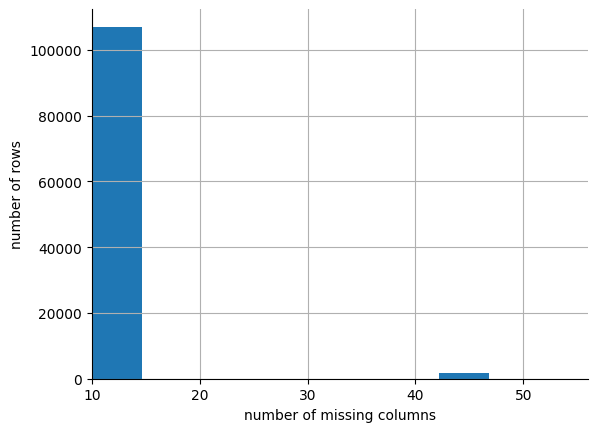

In [12]:
# distribution of the number of missing columns
ax = df[df.isnull().sum(axis=1)>0].isnull().sum(axis=1).hist()
ax.set_xlabel("number of missing columns")
ax.set_ylabel("number of rows")

Number of rows with more than 5 missing columns: 108868


Text(0, 0.5, 'number of rows')

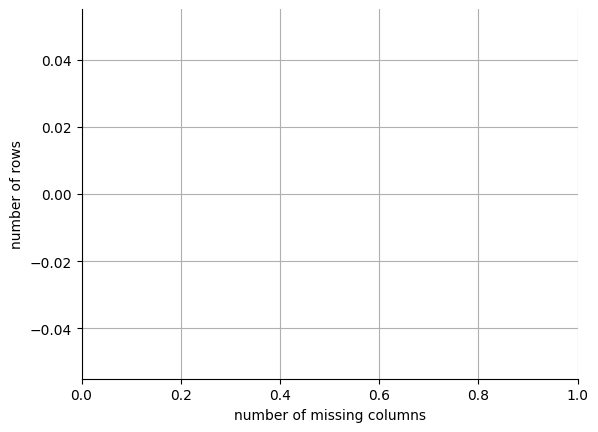

In [13]:
# show how many rows have more than 5 missing columns
df_rows_missingcols = df[df.isnull().sum(axis=1)>5]
print(f'Number of rows with more than 5 missing columns: {df_rows_missingcols.shape[0]}')

# drop them
df = df.drop(df_rows_missingcols.index)

# proof that they were removed (DEBUG)
ax = df[df.isnull().sum(axis=1)>0].isnull().sum(axis=1).hist()
ax.set_xlabel("number of missing columns")
ax.set_ylabel("number of rows")

## Correlation matrix

In [14]:
corr = df.corr()

**Interactive heatmap with Plotly**

In [15]:
import plotly.express as px

# Create a heatmap of the correlation matrix using Plotly
fig = px.imshow(corr, color_continuous_scale='RdBu_r')
fig.update_xaxes(side='top')
fig.update_layout(title='Correlation Heatmap')
fig.show()

Notice how all the "gfs_temperature_xxxxx" are highly correlated among each other and how they are also highly correlated with the target variable.

The latter relationship can be further explored with a scatter plot

## Scatter plot between GFS temperature and fact_temperature

**Note**: among all the gfs_temperature_xxxxx features, the one which correlates the most with fact_temperature can be chosen for the scatter plot.
That ends up being the one at 975hPa, that is the one taken the closest to the ground: it makes sense that it is the one with the highest correlation with the target variable, which captures temperature at 2 metres above the ground.

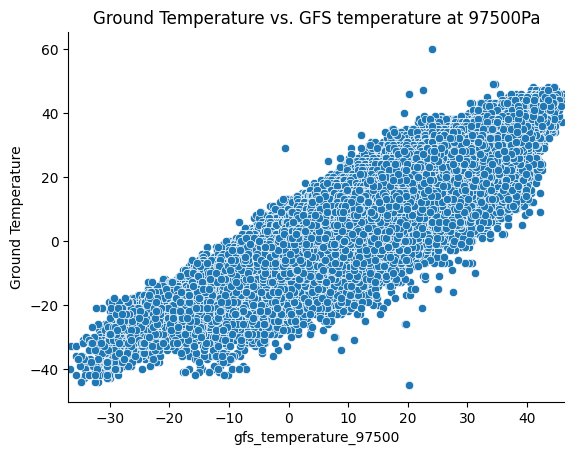

In [16]:
# Plot scatter plot of ground temperature vs. gfs_temperature_9750
sns.scatterplot(data=df, x='gfs_temperature_97500', y='fact_temperature')
plt.xlabel('gfs_temperature_97500')
plt.ylabel('Ground Temperature')
plt.title('Ground Temperature vs. GFS temperature at 97500Pa')
plt.show()

Notice the quasi-linear relationship: Pearson correlation might be employed then for univariate feature selection.

# Data preparation and pre-processing

## Outlier detection 
**Note**: Data is highly dimensional i.e. 113 features, hence plotting a boxplot per each feature might result to be unfeasible. Here listed some doable approaches:


### IQR

In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
outliers_iqr = df[((df<lower_bound)|(df>upper_bound)).any(axis=1)].dropna()

print("Number of outliers using IQR method:", len(outliers_iqr))

Number of outliers using IQR method: 1691976


### Z-score

> The z-score corresponding to each data point represents the distance from the center in terms of standard deviation. For example, a z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier 

In [18]:
import scipy.stats as stats

z = np.abs(stats.zscore(df))
threshold = 3
outliers_zscore = df[(z>threshold).any(axis=1)]

print("Number of outliers using Z-score method:", len(outliers_zscore))

Number of outliers using Z-score method: 622422


## Pre-processing


### Drop constant features

In [20]:
col_var = df.var()
col_zero_var = col_var[col_var == 0].index

print(f"Columns with zero variance: {col_zero_var}")

df = df.drop(columns=col_zero_var)

Columns with zero variance: Index(['cmc_available', 'gfs_available', 'wrf_available'], dtype='object')


### Redundant Features

In this section we find variables that are redundant to decrease the dimensions of the dataset and help speed up processing. We deem a variable redundant if it has a high correlation with another variable, because two such features express the same information.

In [21]:
# This can be changed later if we want
THRESHOLD = 0.99

correlation_matrix = abs(corr)
redundant_features = {}
for feature in correlation_matrix.columns:
    feat_correlation_over_treshold = (correlation_matrix[feature]).loc[correlation_matrix[feature] >= THRESHOLD]
    if len(feat_correlation_over_treshold) == 1:
        correlation_matrix.drop(labels=feature, axis=1, inplace=True)
        correlation_matrix.drop(labels=feature, axis=0, inplace=True)
    else:
        redundant_features[feature] = feat_correlation_over_treshold.index

print(f"The number of features that have a correlation higher than the threshold with some other feature: {len(redundant_features.keys())}")
print(f"The features: {redundant_features.keys()}")

The number of features that have a correlation higher than the threshold with some other feature: 29

The features: dict_keys(['cmc_0_1_65_0', 'cmc_0_1_66_0', 'cmc_0_3_0_0', 'cmc_0_3_0_0_next', 'cmc_0_3_1_0', 'cmc_0_3_5_1000', 'cmc_available', 'cmc_timedelta_s', 'gfs_available', 'gfs_soil_temperature', 'gfs_soil_temperature_available', 'gfs_temperature_40000', 'gfs_temperature_45000', 'gfs_temperature_50000', 'gfs_temperature_55000', 'gfs_temperature_60000', 'gfs_temperature_65000', 'gfs_temperature_70000', 'gfs_temperature_75000', 'gfs_temperature_90000', 'gfs_temperature_92500', 'gfs_temperature_95000', 'gfs_temperature_97500', 'gfs_timedelta_s', 'wrf_available', 'wrf_t2_next', 'wrf_t2_interpolated', 'cmc_0_1_65_0_next', 'cmc_0_1_66_0_next'])


In [22]:
fig = px.imshow(correlation_matrix, color_continuous_scale='reds', x=correlation_matrix.columns)
fig.update_xaxes(side='top')
fig.update_layout(title='Potential Redundancy Matrix')
fig.show()

Up until now, we have found the features that correlate. The next step is to keep only one of each pair / triplet.

In [23]:
target = 'fact_temperature'
features_to_remove = []
for key in redundant_features.keys():
    if key not in features_to_remove:
        for value in redundant_features[key]:
            if value != key and value not in features_to_remove and value!=target:
                features_to_remove.append(value)
                
print(f"The number of features to remove: {len(features_to_remove)}")
print(f"The features: {features_to_remove}") 

The number of features to remove: 13

The features: ['cmc_0_1_65_0_next', 'cmc_0_1_66_0_next', 'cmc_0_3_0_0_next', 'cmc_0_3_5_1000', 'gfs_timedelta_s', 'gfs_soil_temperature_available', 'gfs_temperature_45000', 'gfs_temperature_55000', 'gfs_temperature_65000', 'gfs_temperature_75000', 'gfs_temperature_92500', 'gfs_temperature_97500', 'wrf_t2_interpolated']


In [24]:
for feature in features_to_remove:
    df.drop(labels=feature, axis=1, inplace=True)


In [25]:
print(df.shape)

(1884706, 97)


## Feature selection on the test set

In [26]:
# Columns to drop
cols_to_remove = col_zero_var.tolist()
cols_to_remove.append(features_to_remove)

# Drop them on the test dataframe
for feature in cols_to_remove:
    df_test.drop(labels=feature, axis=1, inplace=True)

## Data shift

[Data Shift](https://towardsdatascience.com/shap-for-drift-detection-effective-data-shift-monitoring-c7fb9590adb0)

### Covariate shift visualization

In [27]:
import seaborn as sns; sns.set()
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.linear_model import LogisticRegression as LR

In [28]:
tr_coordinates = df[['fact_latitude','fact_longitude']].drop_duplicates()
te_coordinates = df_test[['fact_latitude','fact_longitude']].drop_duplicates()

merged = te_coordinates.merge(tr_coordinates, how='left', indicator=True)
tropic_coordinates = merged[merged['_merge']=='left_only']
common_coordinates = merged[merged['_merge']=='both']

In [29]:
# indexes of the samples NOT removed by drop_duplicates()
tr_rem_ind = df[['fact_latitude','fact_longitude']].index.intersection(tr_coordinates.index)
tr_rem_loc = np.where(df[['fact_latitude','fact_longitude']].index.isin(tr_rem_ind))

te_rem_ind = df_test[['fact_latitude','fact_longitude']].index.intersection(te_coordinates.index)
te_rem_loc = np.where(df_test[['fact_latitude','fact_longitude']].index.isin(te_rem_ind))

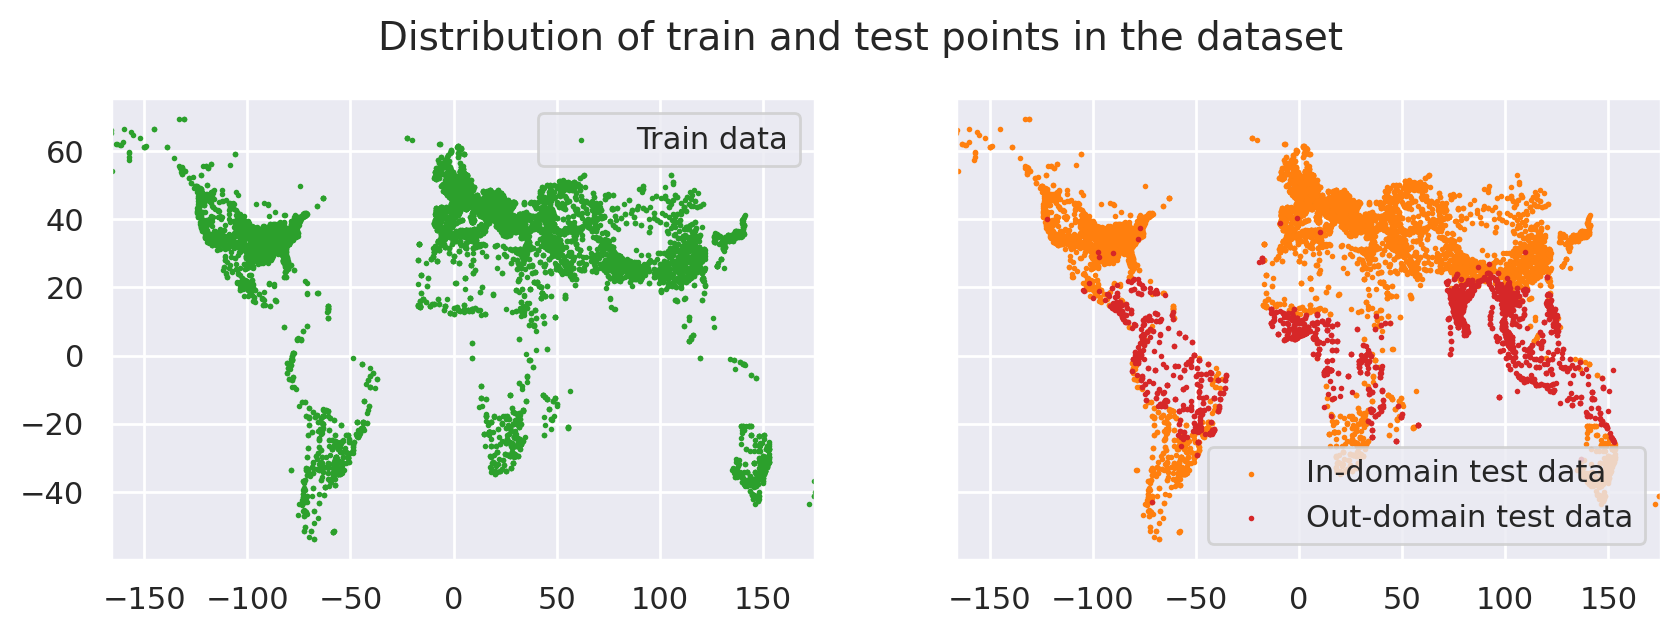

In [30]:
# Plot the data - Visualization from baseline code
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[10, 3], dpi=200, sharex=True, sharey=True)
ax0.scatter(tr_coordinates['fact_longitude'], tr_coordinates['fact_latitude'], 
            s=1, c='tab:green', label='Train data')
ax1.scatter(common_coordinates['fact_longitude'], common_coordinates['fact_latitude'], 
            s=1, c='tab:orange', label='In-domain test data')
ax1.scatter(tropic_coordinates['fact_longitude'], tropic_coordinates['fact_latitude'], 
            s=1, c='tab:red', label='Out-domain test data')
ax0.legend(), ax1.legend()
fig.suptitle('Distribution of train and test points in the dataset', y=1.01, fontsize=14)
plt.show()

### Binary-classifier discriminating between training and test samples

In [31]:
# First we concatenate the training and test data into a new dataset 
# Assign labels 1 and 0 to the training and test data respectively
# i.e. generate a binary-classification training set
df_test_sh = df_test
df_sh = df.drop('fact_temperature', axis=1)
df_test_sh['is_train'] = 0 # 0 means test set
df_sh['is_train'] = 1 # 1 means training set
df_merged = pd.concat( [df_test_sh, df_sh], ignore_index=True, axis=0 )

df_merged = df_merged.reset_index(drop=True)
df_merged = df_merged.drop('index', axis=1)

labels = df_merged['is_train'].values
data = df_merged.drop('is_train', axis=1).values

In [32]:
df_merged

,fact_time,fact_latitude,fact_longitude,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_6_2,cmc_0_0_7_1000,cmc_0_0_7_2,...,cmc_0_1_66_0_grad,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,is_train
0,1.547967e+09,33.466499,-82.039398,129.0,-74.604821,7.053571,756.861547,286.466949,0.875,1.000,...,0.0000,0.0,0.0,0.0,0.0,-3.000000,8.150018,-48.0,1.0,0
1,1.550765e+09,-3.552530,-80.381401,26.0,68.688172,24.221429,754.893806,296.029541,2.625,3.625,...,0.0000,0.0,0.0,0.0,0.0,0.291351,22.141351,2.0,2.0,0
2,1.537093e+09,59.878899,-1.295560,2.0,26.380551,11.789286,756.023981,284.402039,1.125,1.125,...,0.0000,0.0,0.0,0.0,0.0,-1.100006,10.249994,8.0,91.0,0
3,1.548846e+09,39.048801,-84.667801,263.0,-29.799833,0.808571,743.716901,252.938766,7.125,7.500,...,0.1661,0.0,0.0,0.0,0.0,-0.795135,-26.294791,26.0,29.0,0
4,1.547161e+09,32.566700,-117.116997,6.0,27.294687,14.082143,762.318629,284.741882,3.125,4.375,...,0.0000,0.0,0.0,0.0,0.0,0.702820,13.571649,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436875,1.544270e+09,32.446602,-93.825600,75.0,-27.432883,8.558571,761.212366,280.045334,0.500,0.375,...,0.0000,0.0,0.0,0.0,0.0,-1.817993,8.832025,0.0,100.0,1
2436876,1.541552e+09,36.191898,-94.489998,361.0,-6.690413,13.887143,732.386076,281.155746,5.500,3.875,...,0.0000,0.0,0.0,0.0,0.0,-1.136932,6.113062,16.0,99.0,1
2436877,1.545372e+09,38.808899,27.833900,76.0,4.815581,4.407143,750.746603,267.692017,6.625,0.625,...,0.0000,0.0,0.0,0.0,0.0,1.314484,0.850000,0.0,0.0,1
2436878,1.544355e+09,18.310000,-15.969722,-7.0,38.690343,19.170714,760.737441,278.651733,19.500,13.250,...,0.0000,0.0,0.0,0.0,0.0,1.000000,10.850000,0.0,0.0,1


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### PRE-PROCESSING ###
# STANDARDIZATION
scaler = StandardScaler()
# fit and transform training data
data = scaler.fit_transform(data)

# ANOVA FEATURE-SELECTION, select the 15 best features
fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
data = fs.fit_transform(data, labels)

clf = LogisticRegression(max_iter=300)
clf.fit(data,labels)

LogisticRegression(max_iter=300)

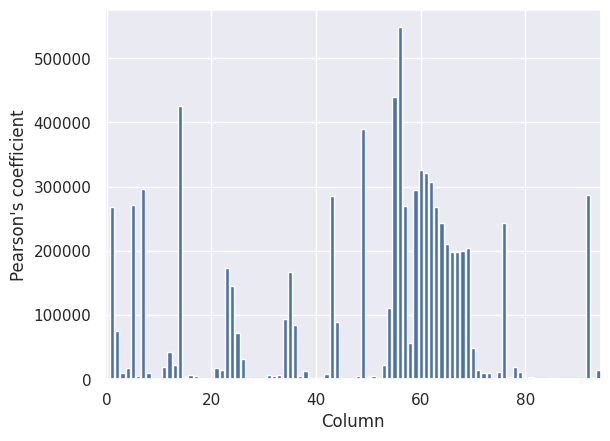

In [34]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Column')
plt.ylabel("Pearson's coefficient")
plt.show()

In [35]:
df_merged["is_train_hat"] = clf.predict(data)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def check_accuracy(df, col_y_pred, col_y_true="label"):
    accuracy = accuracy_score(df[col_y_true], df[col_y_pred])
    precision = precision_score(df[col_y_true], df[col_y_pred])
    recall = recall_score(df[col_y_true], df[col_y_pred])
    print(
        f"""
            accuracy: {round(accuracy, 3)}
            precision: {round(precision, 3)}
            recall: {round(recall, 3)}
    """
    )
    return accuracy, precision, recall

check_accuracy(df_merged, "is_train_hat", "is_train")



            accuracy: 0.847

            precision: 0.861

            recall: 0.957

    


(0.8469337841830538, 0.8607236703328379, 0.9569333360216394)

### Correction factor $\beta_i$ for the training data

In [37]:
# Step 3: get the density ratio for training set
df_sh["density_ratio"] = [
    i[0] / i[1] for i in clf.predict_proba(data[len(df_test):,:])
]

df_sh

,index,fact_time,fact_latitude,fact_longitude,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_6_2,cmc_0_0_7_1000,...,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,is_train,density_ratio
0,0,1.538665e+09,42.696693,23.411436,532.0,11.436109,15.718571,694.970318,279.984589,10.375,...,0.0,0.0,0.0,0.0,0.058990,0.808984,0.0,0.0,1,0.044921
1,1,1.539436e+09,51.447778,4.341944,20.0,26.956421,12.511429,759.973131,288.606445,8.375,...,0.0,0.0,0.0,0.0,0.348022,16.150018,0.0,0.0,1,0.080966
3,3,1.544501e+09,36.029598,-119.063004,132.0,-25.871600,15.259286,754.582732,278.388733,2.500,...,0.0,0.0,0.0,0.0,0.299988,6.450006,0.0,0.0,1,0.122175
4,4,1.538634e+09,34.398300,-96.148102,179.0,-61.020501,20.564286,744.448625,294.560196,3.250,...,0.0,0.0,0.0,0.0,-0.500000,20.749994,0.0,0.0,1,0.339122
5,5,1.546056e+09,33.988800,-98.491898,302.0,-42.316609,6.060714,737.828535,267.796906,5.125,...,0.0,0.0,0.0,0.0,-1.000000,-6.349982,0.0,0.0,1,0.075913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993568,1993568,1.544270e+09,32.446602,-93.825600,75.0,-27.432883,8.558571,761.212366,280.045334,0.500,...,0.0,0.0,0.0,0.0,-1.817993,8.832025,0.0,100.0,1,0.164024
1993570,1993570,1.541552e+09,36.191898,-94.489998,361.0,-6.690413,13.887143,732.386076,281.155746,5.500,...,0.0,0.0,0.0,0.0,-1.136932,6.113062,16.0,99.0,1,0.151168
1993571,1993571,1.545372e+09,38.808899,27.833900,76.0,4.815581,4.407143,750.746603,267.692017,6.625,...,0.0,0.0,0.0,0.0,1.314484,0.850000,0.0,0.0,1,0.124211
1993572,1993572,1.544355e+09,18.310000,-15.969722,-7.0,38.690343,19.170714,760.737441,278.651733,19.500,...,0.0,0.0,0.0,0.0,1.000000,10.850000,0.0,0.0,1,0.380872


n.b. we want to make our data more like it has came from testing distribution rather than training, so we would associate a higher weight to examples in the data resembling the ones in the former.

In [38]:
tr_densities_nondup = (df_sh["density_ratio"].values)[tr_rem_loc]

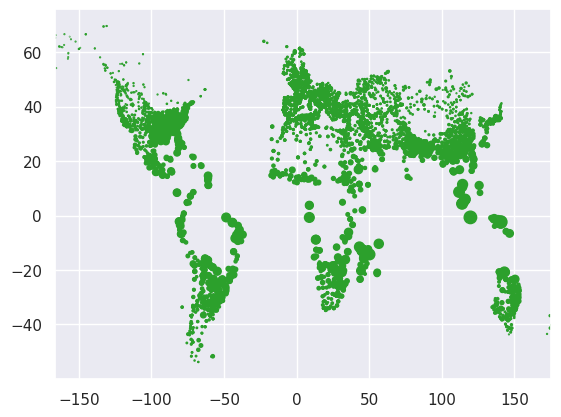

In [39]:
# Scale the size of the training points by their weight via parameter 's' in the scatterplot
scale = tr_densities_nondup*10
plt.scatter(tr_coordinates['fact_longitude'], tr_coordinates['fact_latitude'], 
            s=scale, c='tab:green', label='Train data')
fig.suptitle('Scaled distribution of train points in the dataset', y=1.01, fontsize=14)
plt.show()

# weights can be used with any classifier that takes a sample_weights argument to get accurate cross-validation scores for the test distribution

### Input and target separation

In [40]:
target_col = "fact_temperature"
y = df[target_col]
X = df.drop(columns=[target_col])

### Test/Validation split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
w_train, w_val = train_test_split(df_sh["density_ratio"], test_size=0.3, random_state=32)

### Standardization

In [42]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
scaler = StandardScaler()

# fit and transform training data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

y_mean = y_train.mean()
y_std = y_train.std()

y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std

'\n# create new DataFrame from scaled data\ndf_sc = pd.DataFrame(X_t, columns=X.columns)\n\n# concatenate the scaled input features with the unscaled target column\ndf_sc[target_col] = y\n'

## Feature selection
Filter-based feature selection, using univariate methods.

Possibile algorithms for numerical data with numerical output:
* Pearson's correlation coefficient
* Spearman's rank coefficient

### Pearson's correlation coefficient + SelectKBest

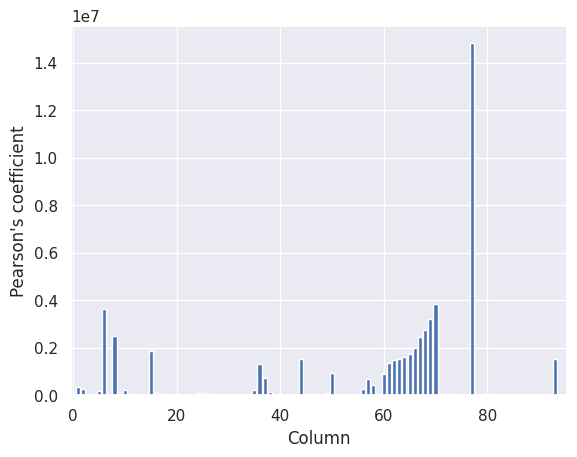

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k='all')
# apply feature selection
X_sel = fs.fit_transform(X_train, y_train)

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Column')
plt.ylabel("Pearson's coefficient")
plt.show()


Some of the features from the 60th to the 80th seem to have high Pearson's correlation coefficient values. Let's discover their names:

In [44]:
print(f"Name of the columns from 60th to 80th: {df.columns[60:80]}")
# print(f"Name of the 87th col: {df.columns[87]} | {fs.scores_[87]}")
# print(f"Name of the 87th col: {df.columns[95]} | {fs.scores_[95]}")

Name of the columns from 60th to 80th: Index(['gfs_temperature_25000', 'gfs_temperature_30000',

       'gfs_temperature_35000', 'gfs_temperature_40000',

       'gfs_temperature_50000', 'gfs_temperature_60000',

       'gfs_temperature_70000', 'gfs_temperature_80000',

       'gfs_temperature_85000', 'gfs_temperature_90000',

       'gfs_temperature_95000', 'gfs_total_clouds_cover_high',

       'gfs_total_clouds_cover_low', 'gfs_total_clouds_cover_middle',

       'gfs_u_wind', 'gfs_v_wind', 'gfs_wind_speed', 'wrf_t2_next', 'wrf_psfc',

       'wrf_rh2'],

      dtype='object')


The first eleven of them are the temperature predictions of the GFS prediction model, which were already known for having high correlation with the target variable (as seen in the correlation matrix a few steps above).

From the bar chart above, we could choose to keep the 30 most informative features in terms of the Pearson's correlation coefficient, which would be more than enough to pick the ones that scored the highest.

In [45]:
def select_features(X_train, y_train, X_test, num_cols):
    fs = SelectKBest(score_func=f_regression, k=num_cols)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Model selection

## Baseline model

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

# feature selection
num_cols = 30
X_train_fs, X_val_fs, fs = select_features(X_train, y_train, X_val, num_cols)

In [47]:
# Train the Lasso Regressor
mod = Lasso(alpha=1)
mod.fit(X_train_fs, y_train)

Lasso(alpha=1)

In [48]:
def compute_rmse(y, ypred, ystd=1.):
    return np.mean((y - ypred)**2)**0.5 * ystd

# Inference
ypred_tr = mod.predict(X_train_fs)
ypred_val = mod.predict(X_val_fs)

# Evaluate predictions with the MSE
print(f'Train RMSE: {compute_rmse(y_train, ypred_tr, y_std):.3f}')
print(f'Valid RMSE: {compute_rmse(y_val, ypred_val, y_std):.3f}')

Train RMSE: 9.995

Valid RMSE: 9.977


## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

"""
mod = RandomForestRegressor(
    n_estimators=250,
    max_depth=10,
    n_jobs=-1
)
"""

'\nmod = RandomForestRegressor(\n    n_estimators=250,\n    max_depth=10,\n    n_jobs=-1\n)\n'

## CatBoost

In [50]:
import catboost as cb

"""
mod = cb.CatBoostRegressor(loss_function=’RMSE’)
grid = {
    'iterations': [100, 150, 200, 300],
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [0.2, 0.5, 1, 3]
}
mod.grid_search(grid, X_train_fs)
"""

"\nmod = cb.CatBoostRegressor(loss_function=’RMSE’)\ngrid = {\n    'iterations': [100, 150, 200, 300],\n    'learning_rate': [0.03, 0.1],\n    'depth': [4, 6, 8, 10],\n    'l2_leaf_reg': [0.2, 0.5, 1, 3]\n}\nmod.grid_search(grid, X_train_fs)\n"

## XGBoost

In [51]:
from xgboost import XGBRegressor

mod = XGBRegressor(
    max_depth=12,
    n_estimators=2000,
    eta=0.1,
    seed=42
)

## Validation RMSE

In [52]:
mod.fit(X_train_fs, y_train, sample_weight=w_train)
ypred_val = mod.predict(X_val_fs)
print(f'Valid RMSE: {compute_rmse(y_val, ypred_val, y_std):.3f}')

Valid RMSE: 1.798


# Model evaluation

In [53]:
# Obtain a numpy array from df_test
X_test = df_test.iloc[:,:-1].values

In [54]:
# Apply standardization
X_test = scaler.transform(X_test)
# Apply SelectKBest feature selection transform
X_test = fs.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:



X does not have valid feature names, but StandardScaler was fitted with feature names




## Obtain the predictions

In [55]:
ypred_test = mod.predict(X_test) * y_std + y_mean  # un-standardization of the predictions

## Submission

In [57]:
submission_df = pd.DataFrame(data={'index': df_test['index'].values,
                                   'fact_temperature': ypred_test.squeeze()})

# Save the predictions into a csv file
# Notice that this file should be saved under the directory `/kaggle/working` 
# so that you can download it later
submission_df.to_csv("../submission.csv", index=False)

In [58]:
# Check the submission file
! head -6 "../submission.csv"

index,fact_temperature

1993574,13.809768

1993575,28.905003

1993576,13.179815

1993577,-15.660948

1993578,16.609182
